# **CS 4361/5361 Machine Learning - Exam 2**

Please rename the notebook as *lastname_firstname_exam2.ipynb* before submitting. 

Good luck!!

## **Question 1**

The following code cell downloads the iris dataset, a commonly used toy dataset.

In [3]:
from sklearn.datasets import load_iris
import numpy as np

X, y = load_iris(return_X_y=True)

### 1. Write functions to return the number of features, the number of examples, and the number of classes in the dataset.

In [4]:
def features(X,y):
  return X.shape[1]

def examples(X,y):
  return X.shape[0]

def classes(X,y):
  return np.max(y)+1

print('Number of features:', features(X,y))
print('Number of examples:',examples(X,y))
print('Number of classes:',classes(X,y))

Number of features: 4
Number of examples: 150
Number of classes: 3


### 2. Write a code cell to randomly split the data into a training and a test set. Keep 80% of the examples for training and the rest for testing. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)

### 3. Write a code cell to classify the data using a random forest and display the resulting test set accuracy.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy = ',accuracy_score(pred,y_test))

Accuracy =  0.9666666666666667


### 4. Write a code cell to classify the data using a support vector classifier and display the resulting confusion matrix.

In [7]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(pred,y_test))

Confusion Matrix
 [[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]


### 5. Write a code cell to classify the data using a decision tree and only one feature in the dataset (you may choose any of the features). Display the resulting test set accuracy. 

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
for i in range(X.shape[1]):  
  model.fit(X_train[:,i:i+1], y_train)
  pred = model.predict(X_test[:,i:i+1])
  print('Attribute {}, Accuracy = {:4.3f}'.format(i,accuracy_score(pred,y_test)))

Attribute 0, Accuracy = 0.567
Attribute 1, Accuracy = 0.533
Attribute 2, Accuracy = 0.933
Attribute 3, Accuracy = 1.000


## **Question 2**

The following code implements a vgg-style network to classify the CIFAR-10 dataset. 

Evaluate the effects of each of the following changes to the original architecture and/or data.

*   Train the network using the test set and evaluate it using the training set. 
*   Increasing the initial learning rate to 10 times the default. 
*   Replacing the activation in the classification layer by sigmoid. 
*   Inserting a dropout layer that will set to zero 20% of the activations between the dense layer and the classification layer. 
*   Converting the images to gray level by averaging their 3 color channels.
*   Converting the problem to a binary classification problems where the classes are animals and objects. 


### 0. Original program

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from keras.utils.vis_utils import plot_model

In [10]:
def plot_results(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  fig, ax = plt.subplots()
  ax.plot(accuracy,label = 'train')
  ax.plot(val_accuracy,label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(loss,label = 'train')
  ax.plot(val_loss,label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')
  plt.show()

Read data

In [11]:
(x_train, y_train_class), (x_test, y_test_class) = tf.keras.datasets.cifar10.load_data()
x_train = np.float32(x_train)/255
x_test = np.float32(x_test)/255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train_class, 10)
y_test = tf.keras.utils.to_categorical(y_test_class, 10)

170508288/170498071 [==============================] - 5s 0us/step


Examine data dimensions

In [12]:
print(x_train.shape, y_train_class.shape, y_train.shape)
print(x_test.shape, y_test_class.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (50000, 10)
(10000, 32, 32, 3) (10000, 1) (10000, 10)


Original Network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

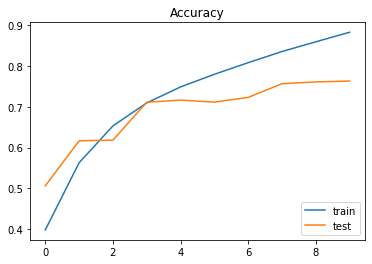

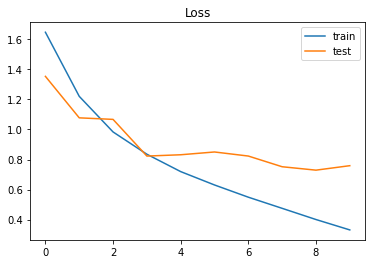

In [13]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 1. Swapping training and test sets.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

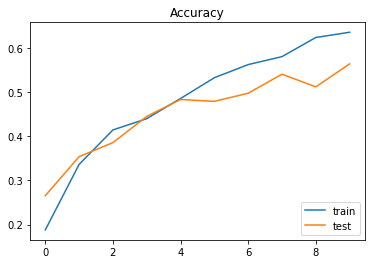

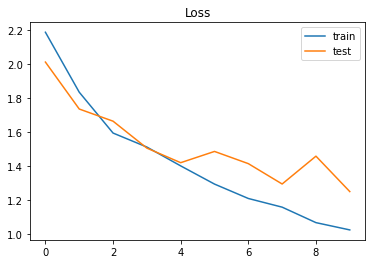

In [14]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_test, y_test,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_train, y_train),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 2. Increasing the learning rate. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

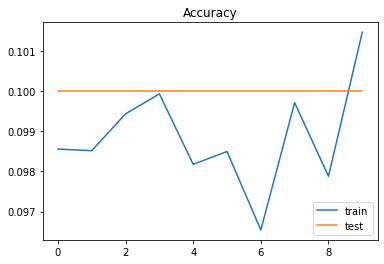

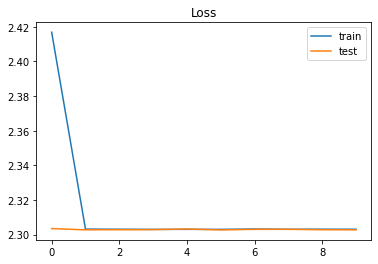

In [15]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 3. Replacing activation in classification layer by sigmoid.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

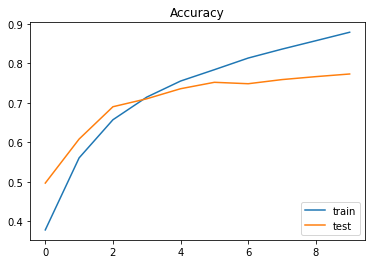

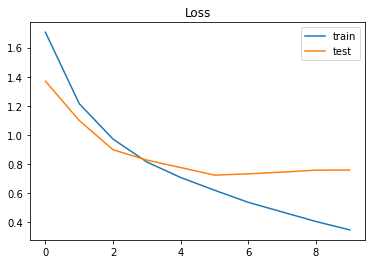

In [16]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  return model

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 4. Inserting a dropout layer that will set to zero 20% of the activations between the dense layer and the classification layer.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

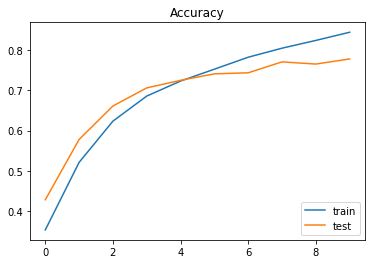

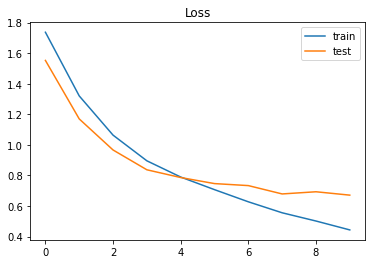

In [17]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  return model

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 5. Converting the images to gray level by averaging their 3 color channels.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

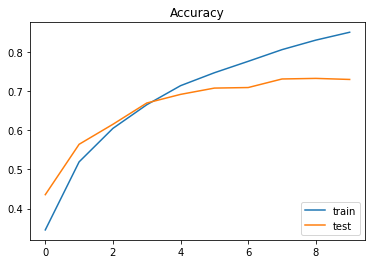

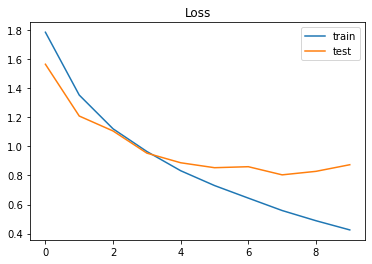

In [ ]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

x_train_bw = np.mean(x_train,axis=3,keepdims=True)
x_test_bw = np.mean(x_test,axis=3,keepdims=True)

cnn = vgg3(input_shape= x_train_bw.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train_bw, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test_bw, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)

### 6. Converting the problem to binary classification.

In [ ]:
class_names= ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

animals = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse'] # Class 0, y_train_class in [2,3,4,5,6,7]
objects = ['airplane', 'car', 'ship','truck']             # Class 1, y_train_class in [0,1,8,9]


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

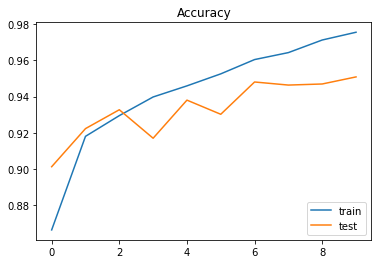

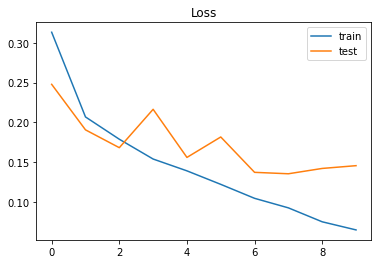

In [18]:
def vgg3(input_shape=(32,32,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return model

y_train_binary = tf.keras.utils.to_categorical([int(y in [0,1,8,9]) for y in y_train_class.reshape(-1)],2)
y_test_binary = tf.keras.utils.to_categorical([int(y in [0,1,8,9]) for y in y_test_class.reshape(-1)],2)

cnn = vgg3(input_shape= x_train.shape[1:])
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
    
history = cnn.fit(
    x_train, y_train_binary,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test_binary),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

plot_results(history)